# Akash patil 
aakashgolu1008@gmail.com

#                                                 Naive Bayes

# What is Naive Bayes Classifier?
Naive Bayes is a statistical classification technique based on Bayes Theorem. 

It is one of the simplest supervised learning algorithms.

Naive Bayes classifier is the fast, accurate and reliable algorithm.

Naive Bayes classifiers have high accuracy and speed on large datasets.

In simple terms, a naive Bayes classifier assumes that the presence (or absence) of a particular feature of a class is unrelated(independent) to the presence (or absence) of any other feature, given the class variable.

Basically, it's "naive" because it makes assumptions that may or may not turn out to be correct.

In [ ]:


#p(A/B)=P(A INTER B)  / P(B)
#P(B/A)=P(B INTER A) / P(A)

#p(A/B) P(B) = P(A INTER B)
#P(B/A) P(A) = P(B INTER A)

#p(A/B) =P(B/A) P(A)  / P(B)  #naive bayes
#


# How Naive Bayes classifier works?

Let’s understand the working of Naive Bayes through an example.
Given an example of company logo and fraoud detection. You need to calculate the probability of frouad.
Now, you need to classify whether job will frouad or not, based on the company logo condition.

First Approach (In case of a single feature)

Naive Bayes classifier calculates the probability of an event in the following steps:

Step 1: Calculate the prior probability for given class labels

Step 2: Find Likelihood probability with each attribute for each class

Step 3: Put these value in Bayes Formula and calculate posterior probability.

Step 4: See which class has a higher probability, given the input belongs to the higher probability class.

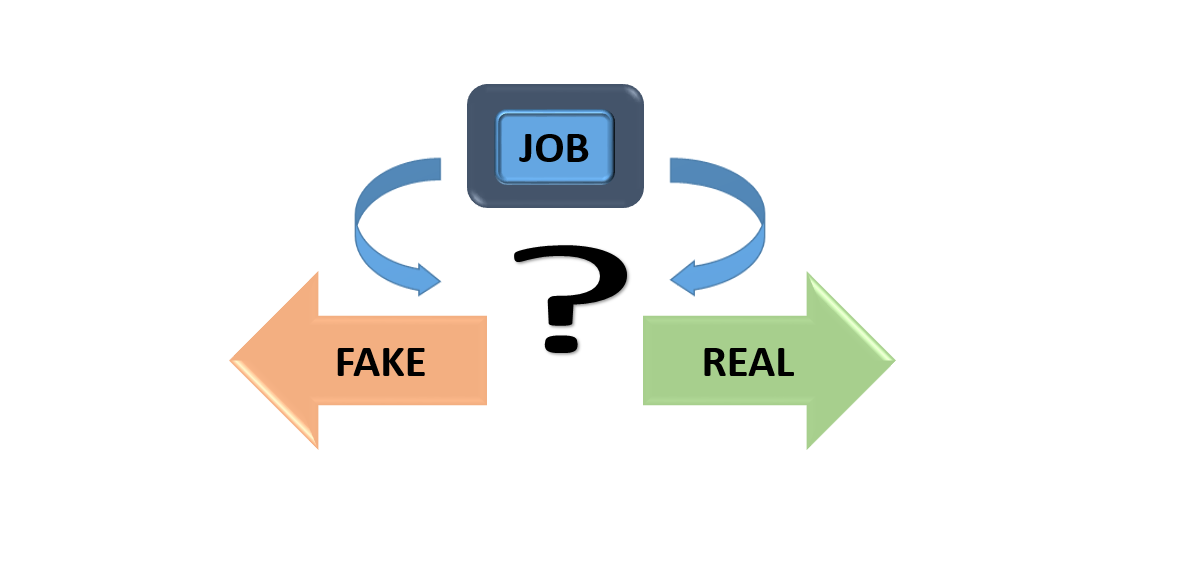

For simplifying prior and posterior probability calculation you can use the two tables frequency and likelihood tables.
Both of these tables will help you to calculate the prior and posterior probability. 

The Frequency table contains the occurrence of labels for all features. 

There are two likelihood tables. 

Likelihood Table 1 is showing prior probabilities of labels and

Likelihood Table 2 is showing the posterior probability.

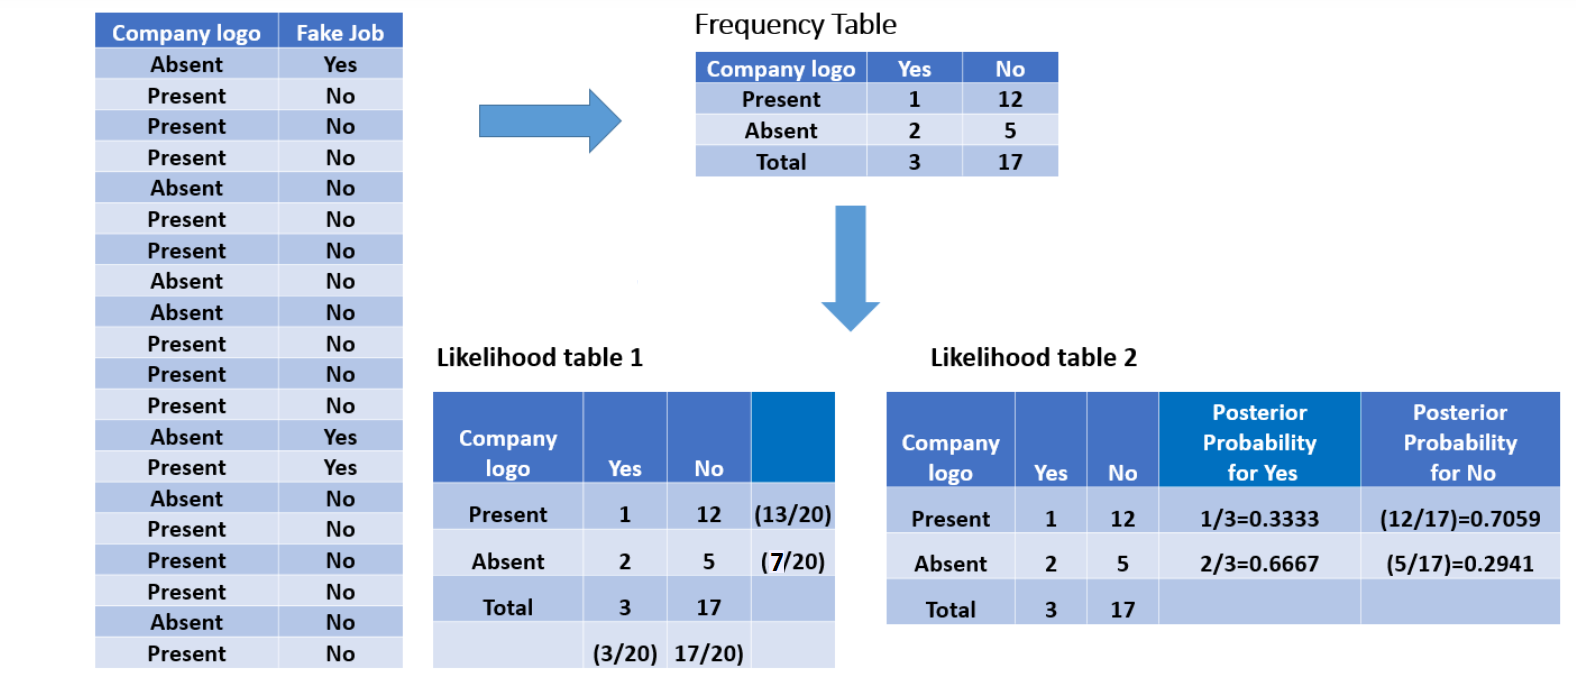

In [ ]:
# p(yes/ present,website_p)= p(present/yes).p(website_p / yes). p(yes)/ p(present,w)

Now suppose you want to calculate the probability of fraoud when the company logo  is present.

Probability of fraoud:   PRESENT

### #P(Yes | Present) = P(Present | Yes) P(Yes) / P (Present) .....................(1)

Calculate Prior Probabilities:

#### P(Present) = 13/20 = 0.65

#### P(Yes)= 3/20 = 0.15

Calculate Posterior Probabilities:

#### P(Present |Yes) = 1/3=0.3333

Put Prior and Posterior probabilities in equation (1)

##### P (Yes | Present) = 0.3333 * 0.15/ 0.65 = 0.0769

Similarly, you can calculate the probability of not playing:

Probability of no-Fake:

#### P(No | Present) = P(Present | No) P(No) / P (Present) .....................(2)

Calculate Prior Probabilities:

#### P(Present) = 13/20 = 0.65

#### P(No)= 17/20 = 0.85

Calculate Posterior Probabilities:

#### P(Present |No) = 12/17 = 0.7059

Put Prior and Posterior probabilities in equation (2)

#### P (No | Present) = 0.7059* 0.85 / 0.65 = 0.923(Higher)

The probability of a 'No' class is higher.
So you can determine here if the company logo is present then posted job post will non-fake(Real).

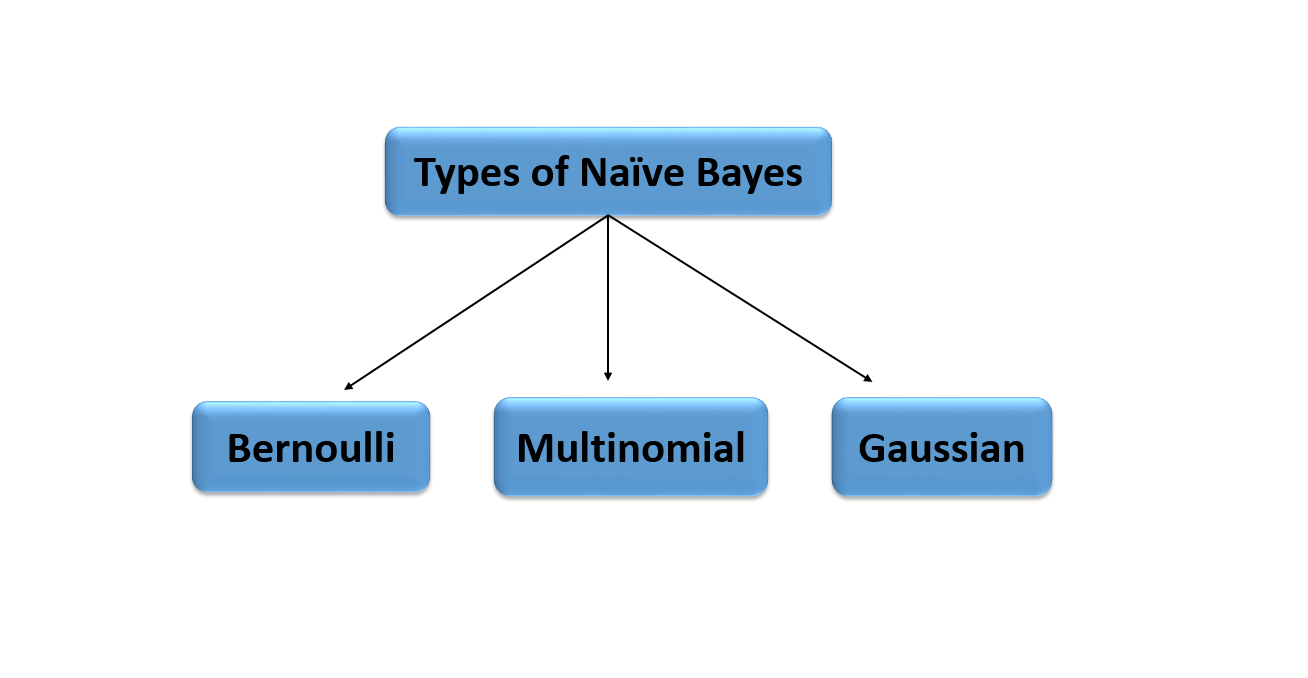

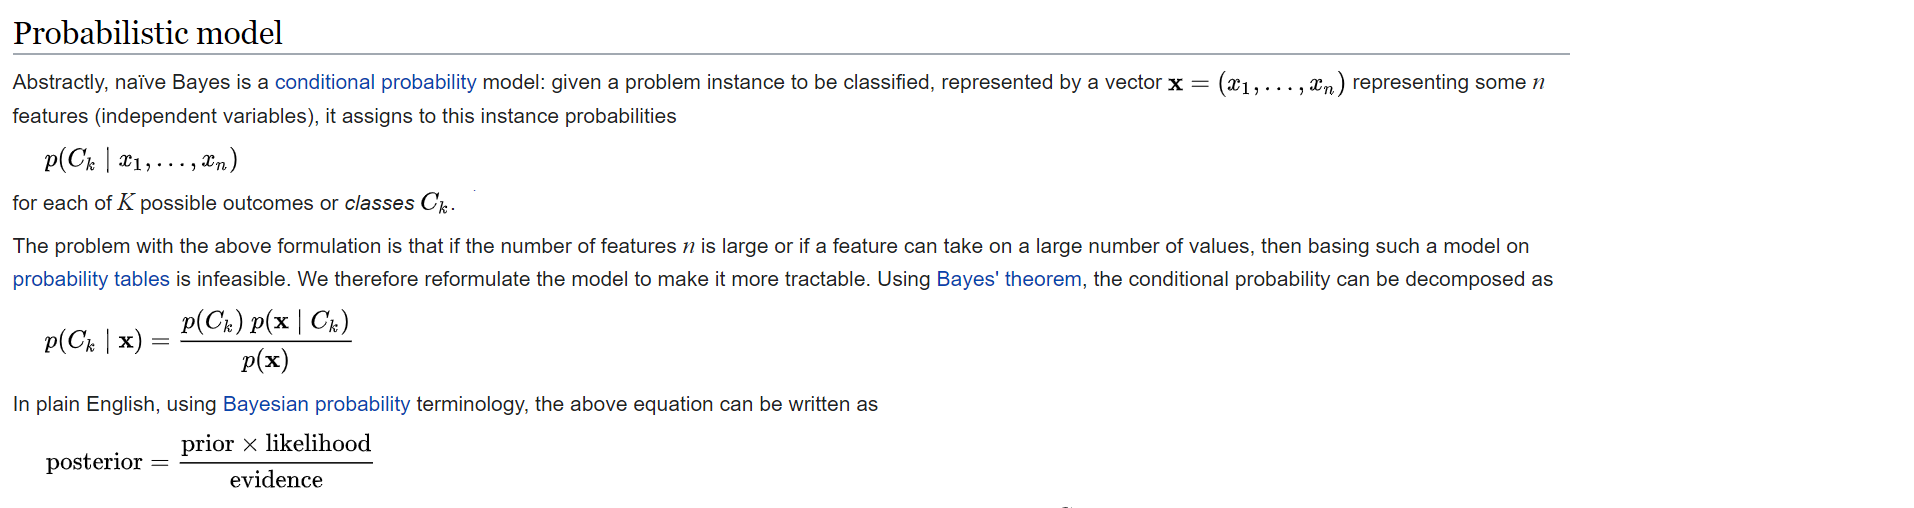
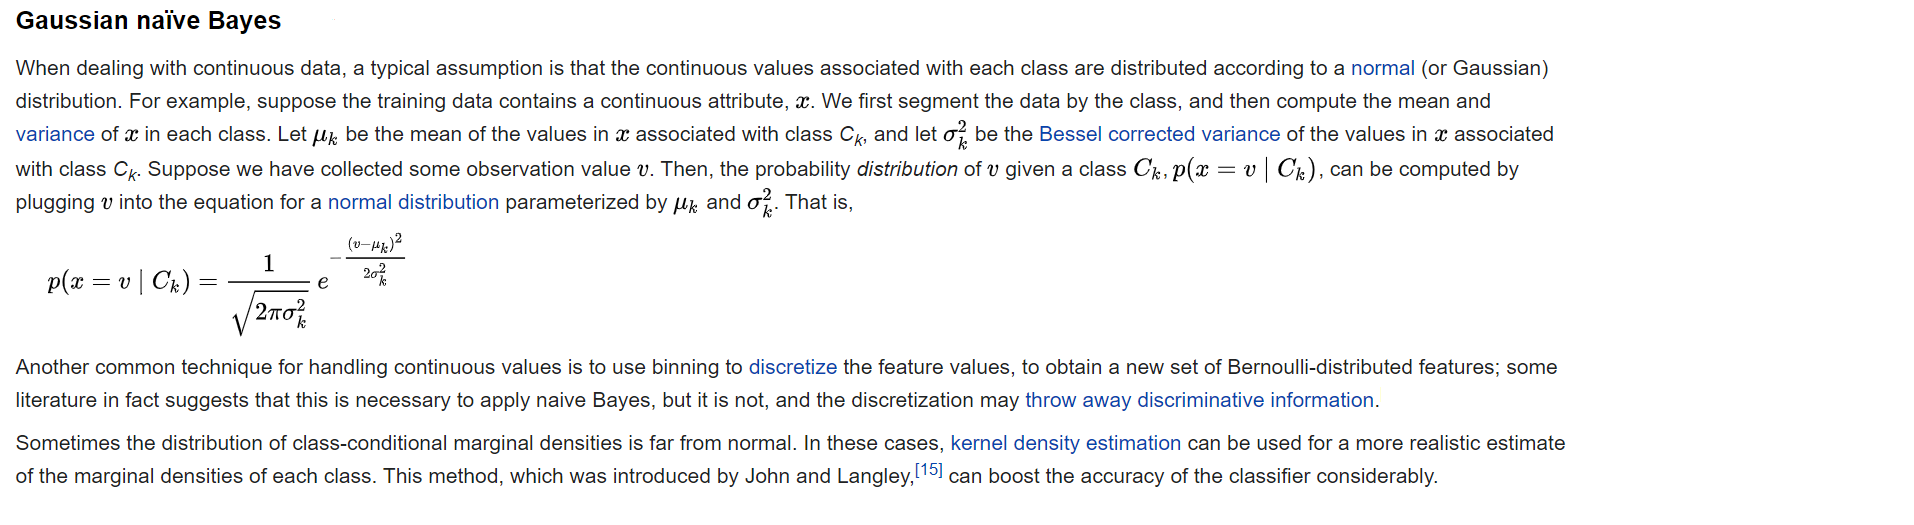
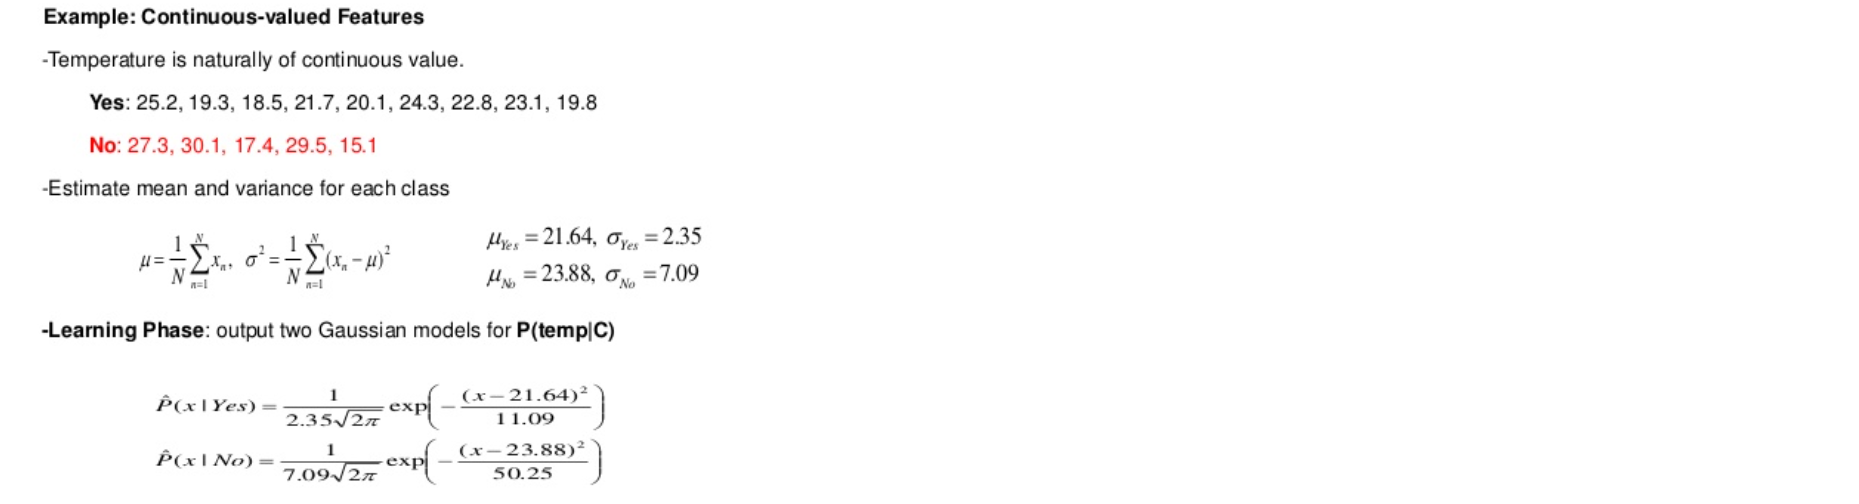
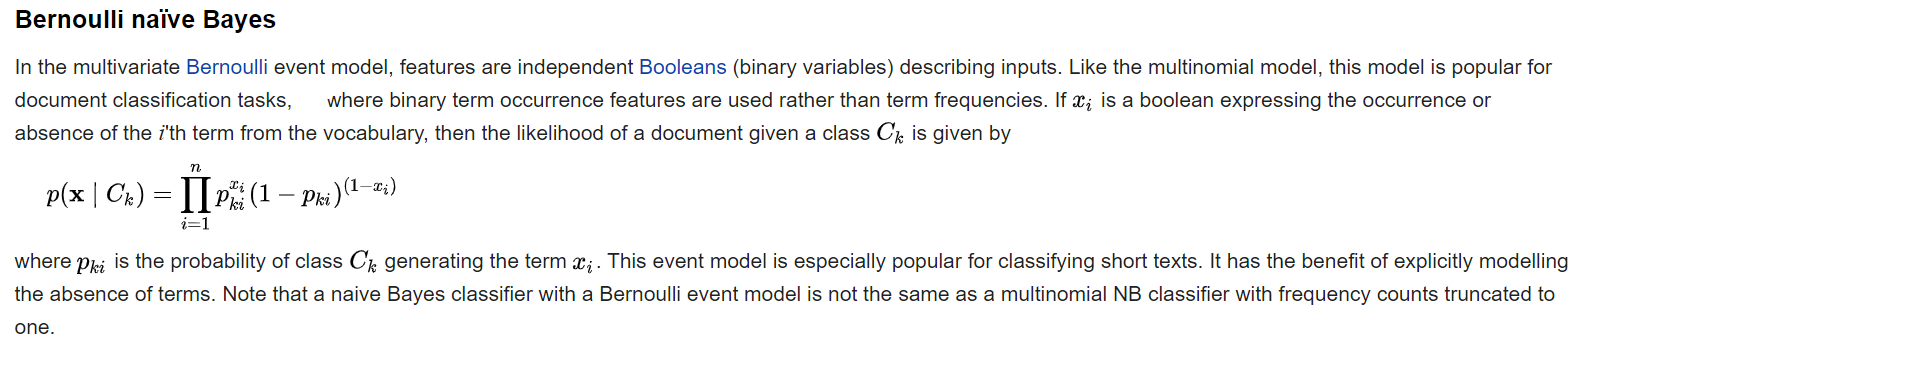

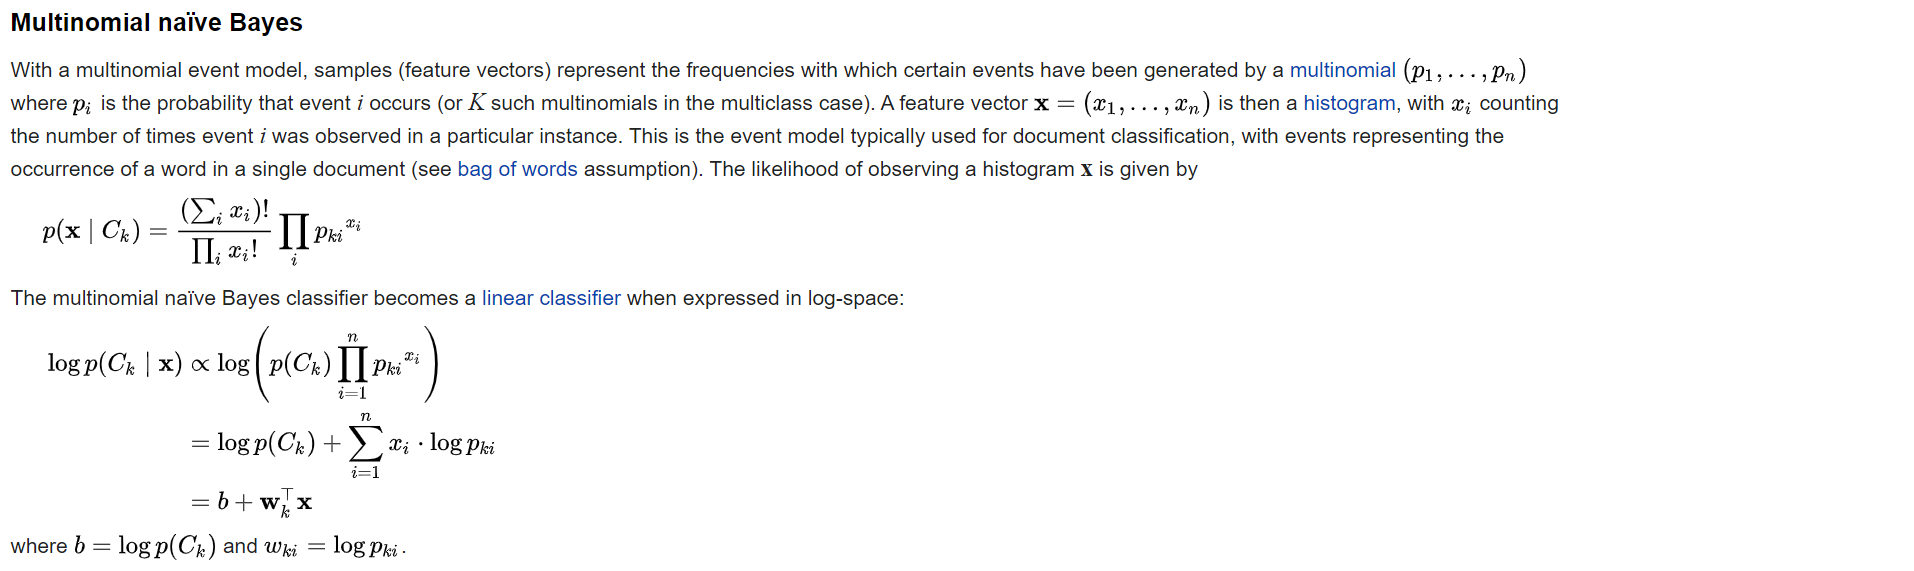


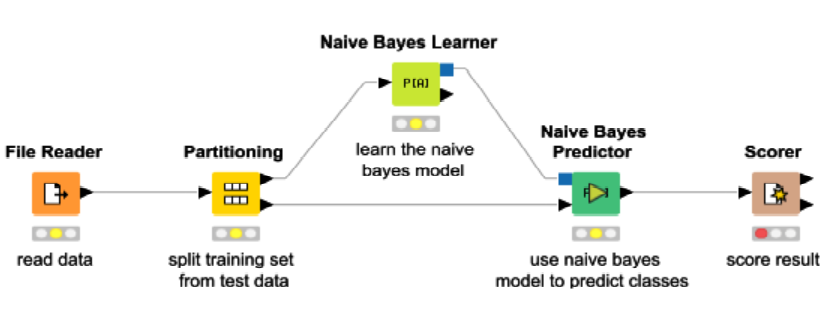

In [12]:
#Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline
sns.set()

# Gaussian Naive Bayes: Sklearn implementation

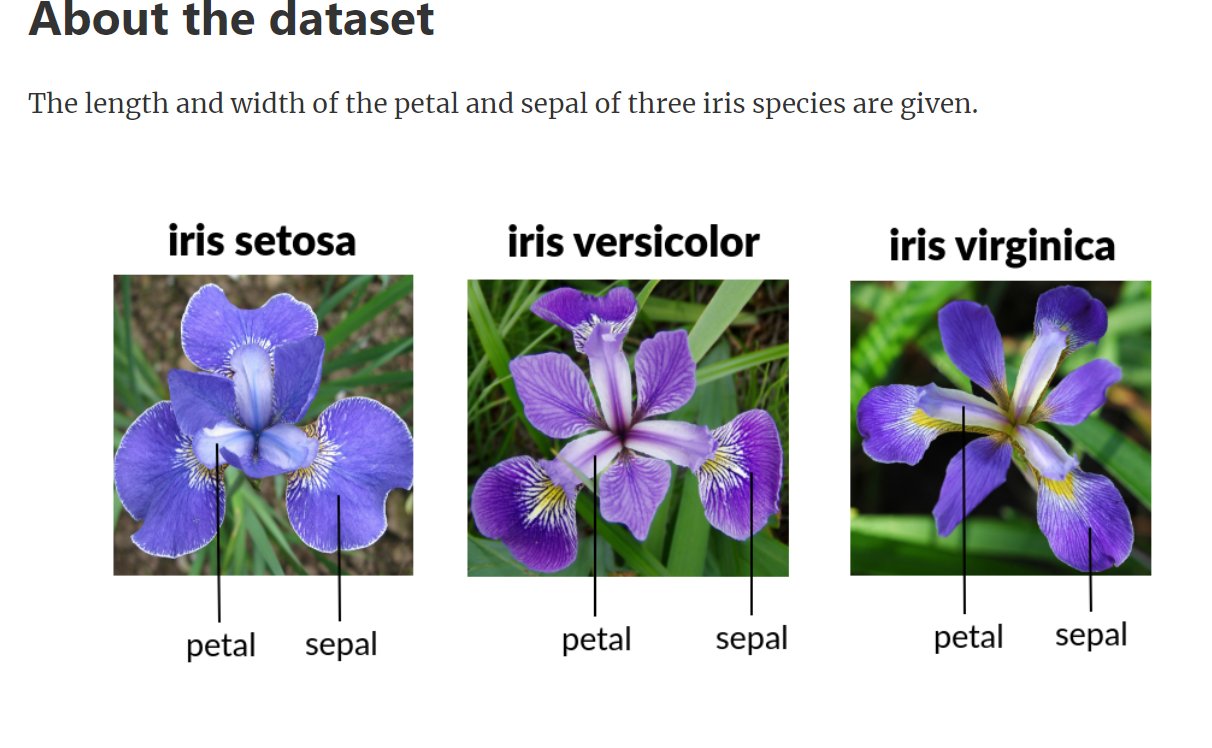

In [3]:
# 1. data read : df=read_csv("c:/...../file.csv")
# 2. find problem statment 
# 3. decide dependent variable(1) and independent(multiple) variable
# eg. iris data: dependent=species , independent: sl, sw, pl, pw
# 4. data cleaning: missing value,  varible selection, lebel encoding
# 5. seperate dep.(y) and indep.(x) variable 
# 6. train test split
# 7. model selection 
# 8. model.fit(xtrain,, ytrain)
# 9.model.predict(xtest)
# 10. accuaracy ( prediction, ytest)
# 11. Evaluation: confussion matrix, ROC curve, classification report
# 12. best model saved

In [4]:
#Load the data set
iris = sns.load_dataset("iris")
#iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#df1 = iris[["sepal_length", "sepal_width",'species']]
#Setup X and y data
#X_data = df1.iloc[:,0:2]
#y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
#Setup X and y data
X_data = iris.iloc[:,0:4]
y_labels = iris.iloc[:,4] #.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.3,random_state=101) # 70% training and 30% test
X_train

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
102,7.1,3.0,5.9,2.1
67,5.8,2.7,4.1,1.0
34,4.9,3.1,1.5,0.2
98,5.1,2.5,3.0,1.1
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


# Generating Model
Generate a model using naive bayes classifier in the following steps:

Create naive bayes classifier

Fit the dataset on classifier

Perform prediction

In [26]:
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
#Fit model
model_sk = BernoulliNB()
#Train the model using the training sets
model_sk.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model_sk.predict(X_test)
y_pred

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
X_test.head()

Accuracy: 0.26666666666666666


,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
43,5.0,3.5,1.6,0.6
129,7.2,3.0,5.8,1.6
50,7.0,3.2,4.7,1.4


# Application of naive bayes Classifier:
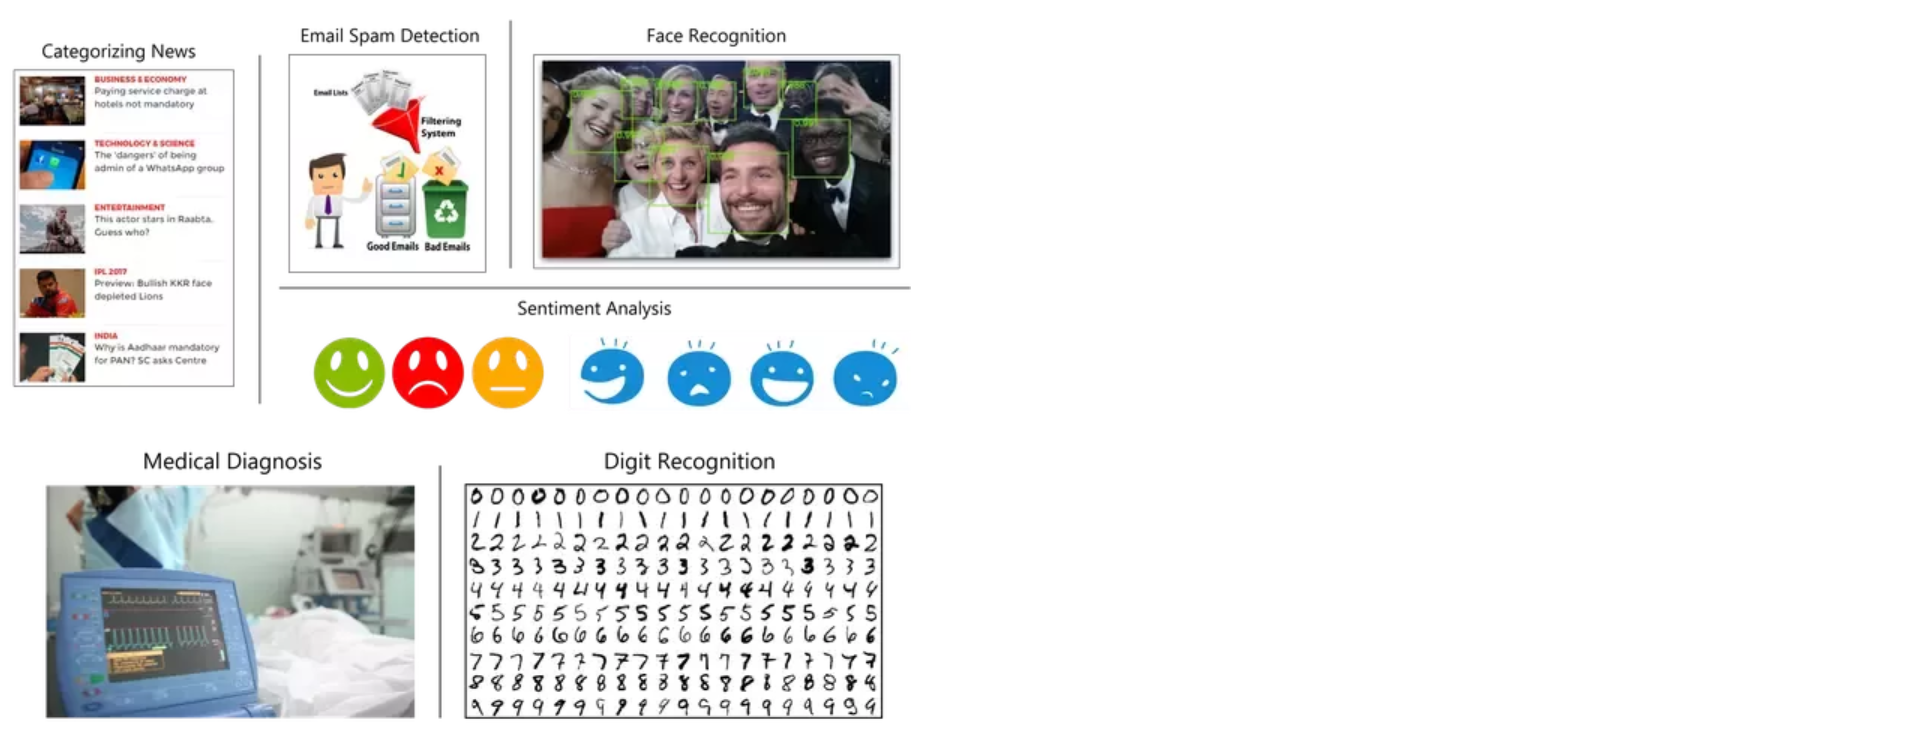

# Advantages and Disadvantages of Naive Bayes Classifier:

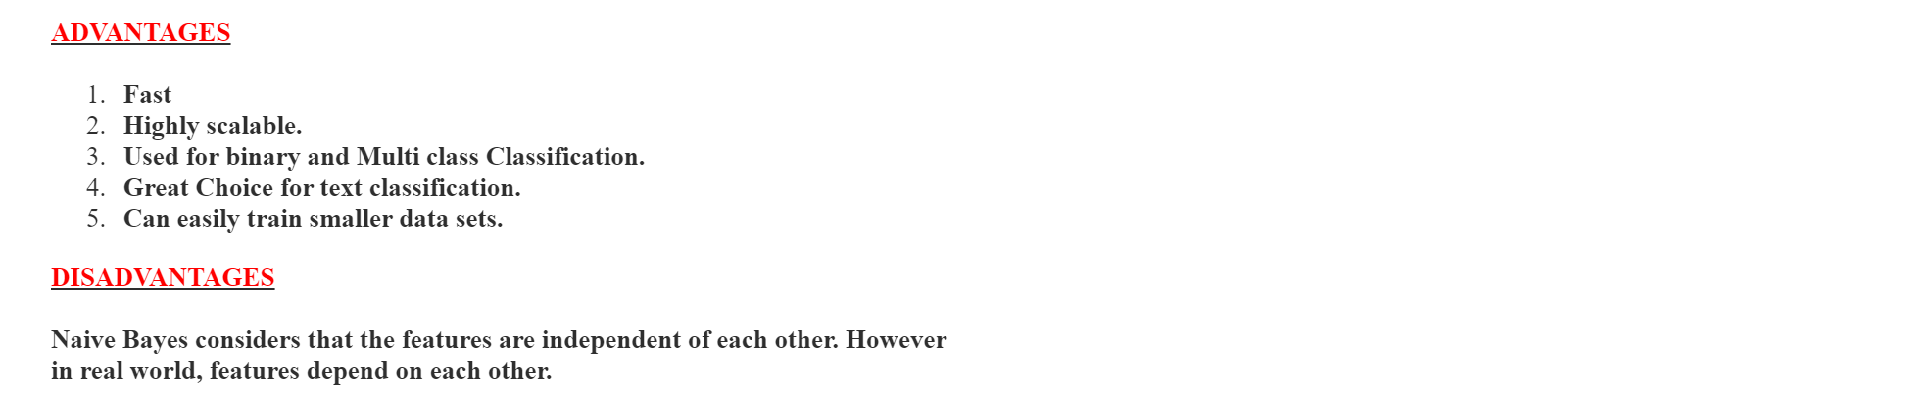